Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

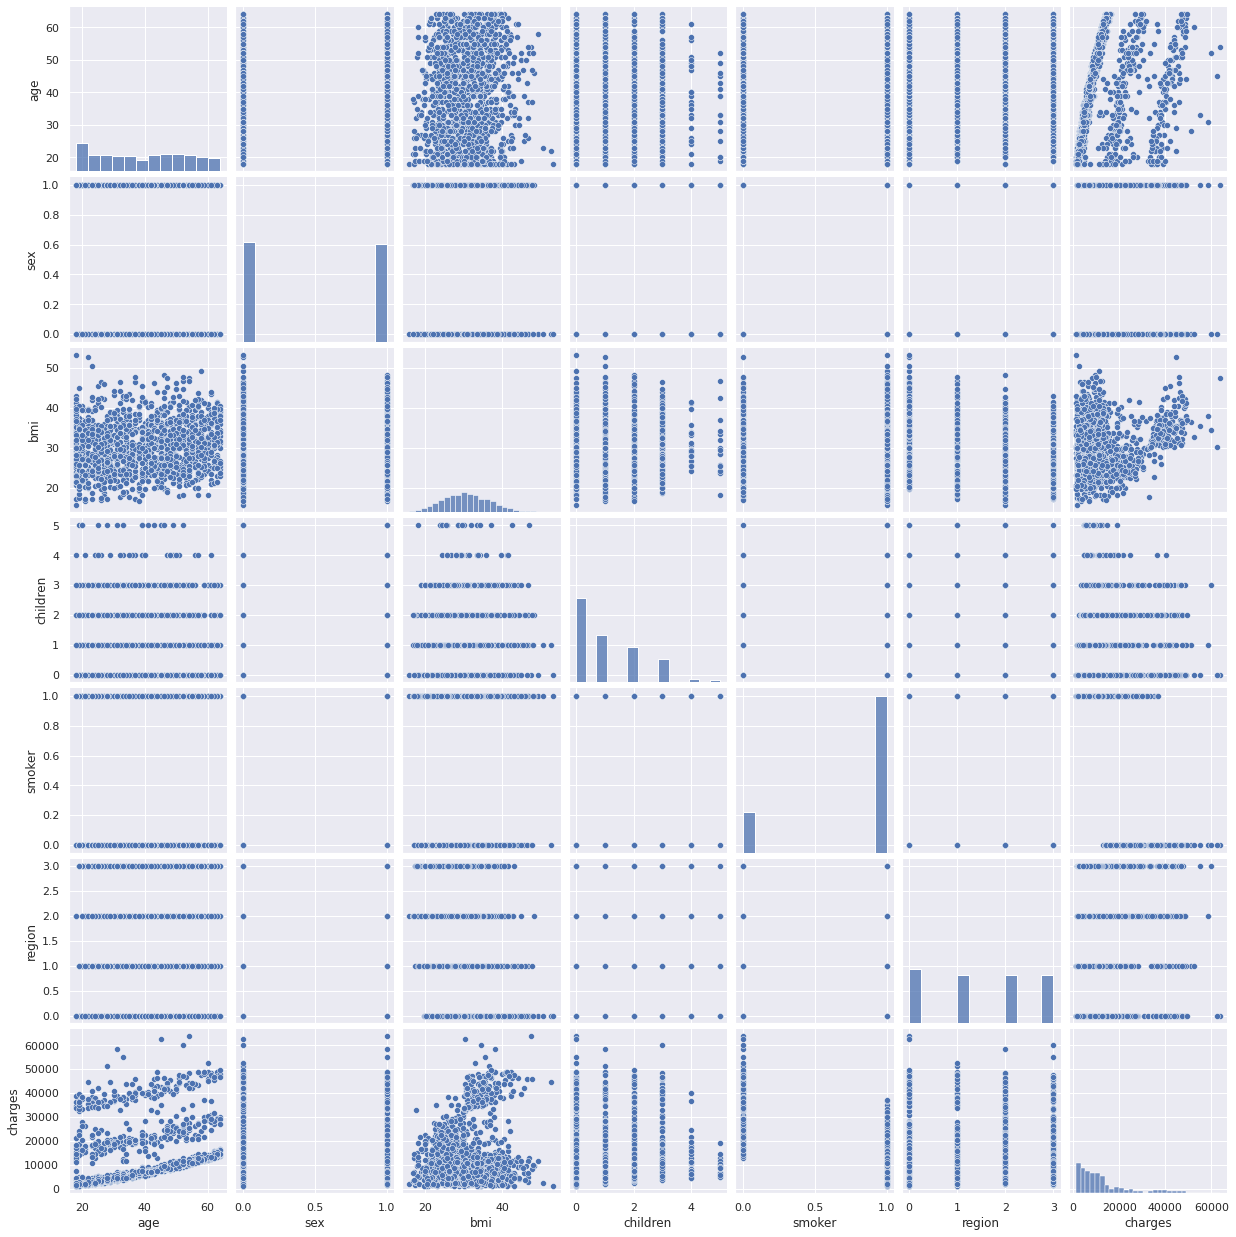

In [ ]:
# visualization of data
sns.pairplot(insurance_dataset)

Data Collection & Analysis

In [ ]:
# loading the data from csv file to a Pandas DataFrame
insurance_dataset = pd.read_csv('/content/insurance.csv')

In [ ]:
# first 5 rows of the dataframe
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [ ]:
# number of rows and columns
insurance_dataset.shape

(1338, 7)

In [ ]:
# getting some informations about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data Analysis

In [ ]:
# statistical Measures of the dataset
insurance_dataset.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.795217,1.455904,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.130888,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,1.000000,0.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,1.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,1.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


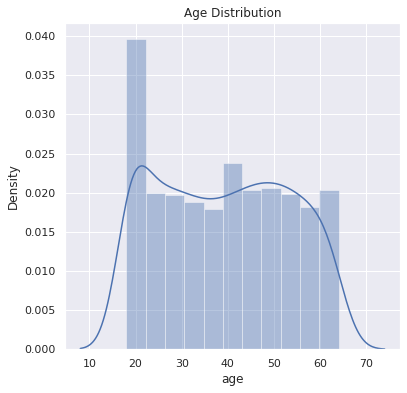

In [ ]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

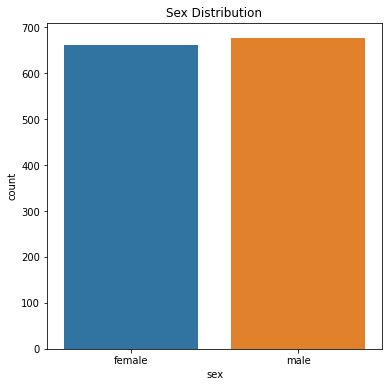

In [ ]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [ ]:
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


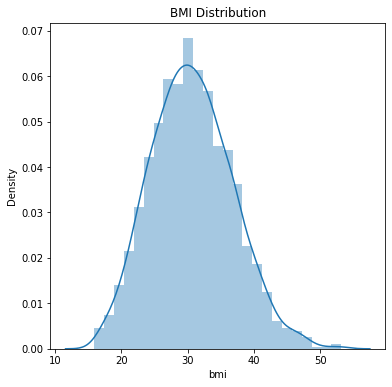

In [ ]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

Normal BMI Range --> 18.5 to 24.9

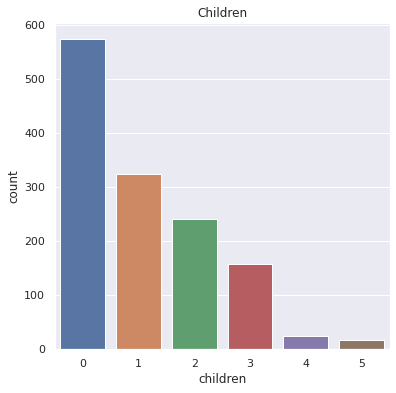

In [ ]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Children')
plt.show()

In [ ]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

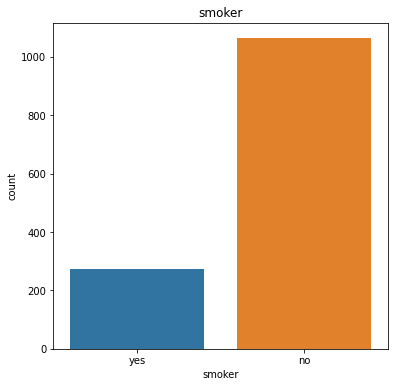

In [ ]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('smoker')
plt.show()

In [ ]:
insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

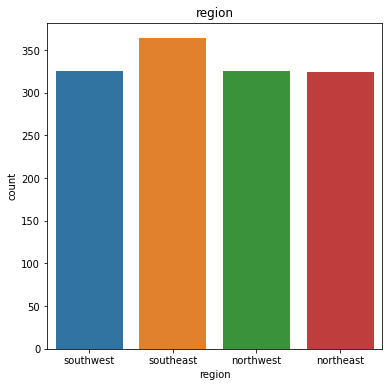

In [ ]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('region')
plt.show()

In [ ]:
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


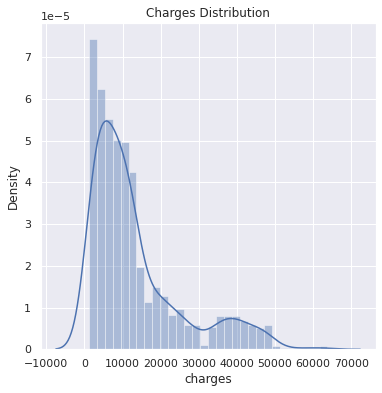

In [ ]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

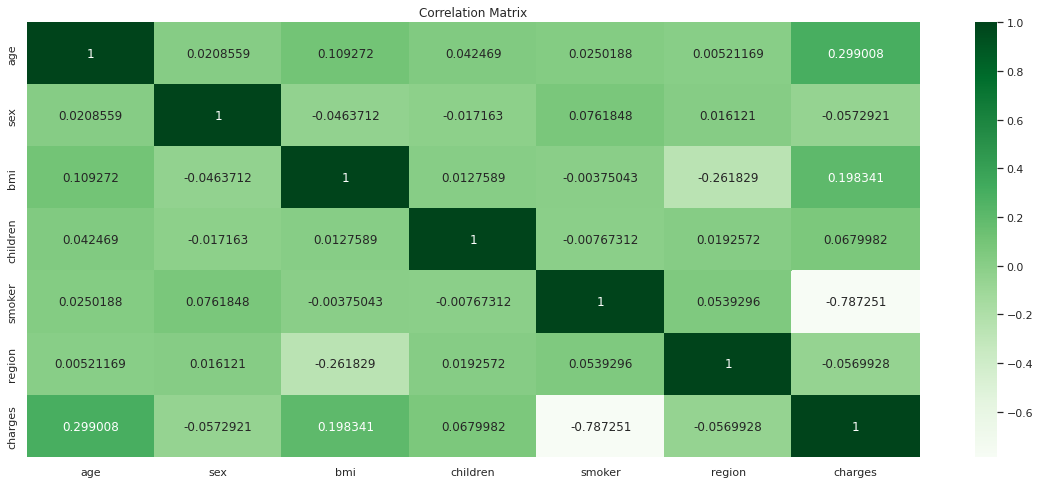

In [ ]:
fig,ax= plt.subplots(1,1,figsize = (20,8))

_ = ax.set_title("Correlation Matrix")
_ = sns.heatmap(insurance_dataset.corr(),annot=True,fmt="g",cmap="Greens")


Data Pre-Processing

Encoding the categorical features

In [ ]:
# encoding sex column
insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)

3 # encoding 'smoker' column
insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

Splitting the Features and Target

In [ ]:
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']

In [ ]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [ ]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting the data into Training data & Testing Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training

Linear Regression

In [ ]:
# loading the Linear Regression model
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [ ]:
# prediction on training data
#training_data_prediction =regressor.predict(X_train)

In [ ]:
# R squared value
#r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared value :')
regressor.score(X_train, Y_train)

R squared value :


0.7413131194887537

In [ ]:
# prediction on test data
#test_data_prediction =regressor.predict(X_test)

In [ ]:
# R squared value
# R squared value
#r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared value :')
regressor.score(X_test, Y_test)

R squared value :


0.783021587162344

Building a Predictive System

In [ ]:
# testing data
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

In [ ]:
predicted_value=regressor.predict(X_test)
predicted_value

array([ 8597.28489536,  7231.74388195, 37039.23208958,  9616.21212862,
       27161.15504663, 11108.40935815,   354.21613174, 17042.35421504,
         747.16617118, 11372.94571472, 28400.38875084,  9533.99600035,
        5216.48749305, 38355.5614174 , 40201.25019476, 37046.88317993,
       15158.02888612, 35867.31947109,  9063.07424995, 31650.09572393,
        4122.46955807, 10389.18037453,  2647.70215941,  6752.0935722 ,
       11455.70143538, 12576.55372408, 14761.43409329,  6317.33228079,
        9588.04741124,  2138.14714947,  9375.87714427, 13225.72806329,
        4510.16138921,  3585.45839256,  4732.66994672, 12637.34626748,
        2260.33231947,  9078.92932601, 33459.16411947, 32548.1168527 ,
        4174.80105455,  4490.15618578, 14392.1262442 , 11588.95999023,
        8712.67197642, 12363.57345011,  5437.31098673,  3428.38801627,
       35447.7739549 ,  9084.07365487, 15767.62103266,  2302.7507234 ,
       12500.96481021,  1124.34689348, 13327.47845234, 12187.16682473,
      

In [ ]:
comparing=pd.DataFrame({"Test value":Y_test,"Predicted Value":predicted_value})
comparing

,Test value,Predicted Value
764,9095.06825,8597.284895
887,5272.17580,7231.743882
890,29330.98315,37039.232090
1293,9301.89355,9616.212129
259,33750.29180,27161.155047
...,...,...
109,47055.53210,39017.518638
575,12222.89830,11922.482922
535,6067.12675,7316.166925
543,63770.42801,40853.403071


In [ ]:
r2score=r2_score(comparing["Test value"],comparing["Predicted Value"])
r2score

0.783021587162344

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

In [ ]:
X_c = insurance_dataset.drop('charges',axis=1).values
y_c = insurance_dataset['charges'].values.reshape(-1,1)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c,y_c,test_size=0.2, random_state=42)

X_train_scaled = StandardScaler().fit_transform(X_train_c)
y_train_scaled = StandardScaler().fit_transform(y_train_c)
X_test_scaled = StandardScaler().fit_transform(X_test_c)
y_test_scaled = StandardScaler().fit_transform(y_test_c)

svr = SVR()